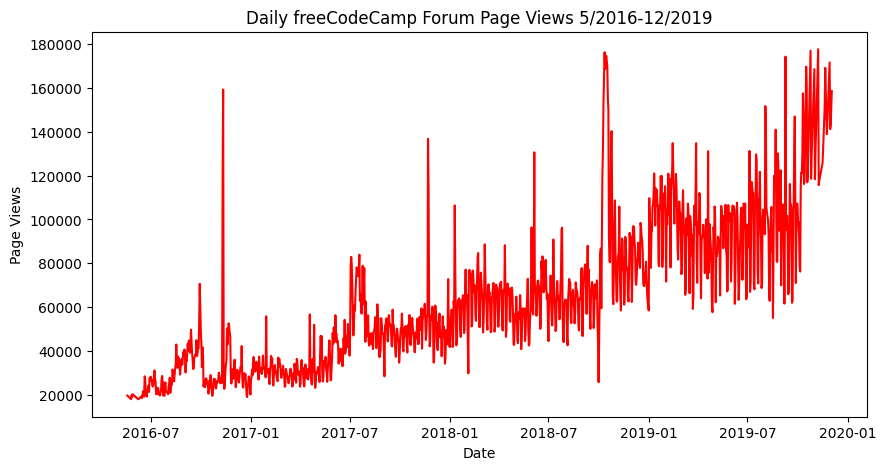

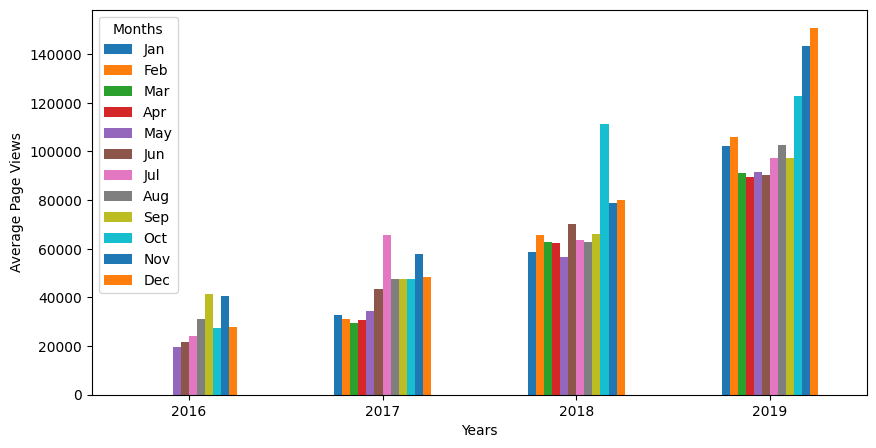

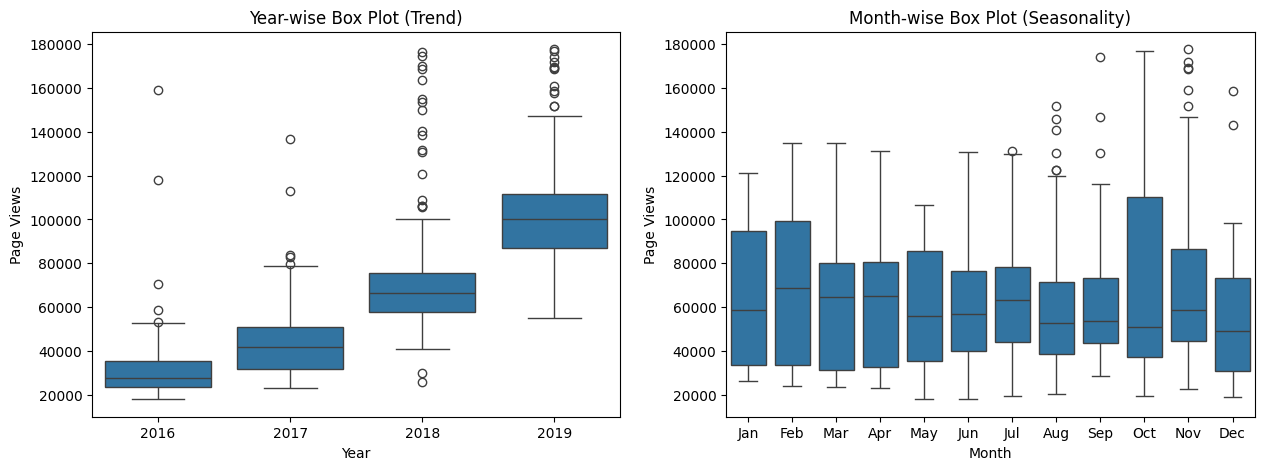

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load and clean data
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

# Line plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df["value"], color="red")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig

# Bar plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month
    df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    fig = df_bar.plot(kind="bar", figsize=(10, 5), legend=True).get_figure()
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.xticks(rotation=0)
    fig.savefig('bar_plot.png')
    return fig

# Box plots
def draw_box_plot():
    df_box = df.copy().reset_index()
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1], order=months_order)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig('box_plot.png')
    return fig

# Generate and display plots
draw_line_plot()
plt.show()

draw_bar_plot()
plt.show()

draw_box_plot()
plt.show()
